In [1]:
import numpy as np
#from conf_exp6 import *
%pylab inline
#import seaborn
import matplotlib.pyplot as plt
import utils.img_utils as iu
import json


def mm(A, cast_int=True):
    if cast_int:
        return (int(A.min()), int(A.max()))
    else:
        return (A.min(), A.max())

Populating the interactive namespace from numpy and matplotlib


In [2]:
#parameter_name = 'lamda'
#idjob='201610141834'
#idjob='201610160213'
#idjob='201610172354'

#parameter_name = 'gamma'
#idjob='201610200008'

parameter_name = 'beta'
idjob='201610202108'
 

formula = 'f1'
base_folder = './results/exp6pixel/%s/%s.%s/'%(formula, parameter_name, idjob)


with open(base_folder + 'data.json') as data_file:    
    data = json.load(data_file)

params_range = data['params_range']
rango = params_range[parameter_name]
#rango = np.arange(100, 1001, 100)

GROUPS=5
FITS=10
RANGO=len(rango)
print rango 

mse = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse1000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse2000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse3000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
a = np.zeros((RANGO), dtype='float')

name_tmp1 = base_folder + 'mse_g%d_f%d'+'.npy'
name_tmp2 = base_folder + 'mse%d_g%d_f%d'+'.npy'
for group in xrange(GROUPS):
    #if group==0 : continue
    for fit in xrange(FITS):
        #if fit == 0 : continue
        print 'loading', name_tmp1%(group, fit)
        tmp = np.load(name_tmp1%(group, fit))
        a = a + tmp
        mse[:, fit, group] = tmp
        mse1000[:, fit, group] = np.load(name_tmp2%(1000, group, fit))
        mse2000[:, fit, group] = np.load(name_tmp2%(2000, group, fit))
        mse3000[:, fit, group] = np.load(name_tmp2%(3000, group, fit))

a = a / (FITS*GROUPS)
        
print mse.shape, mse1000.shape, mse2000.shape, mse3000.shape


[1.452e-15, 2.0000000000000013, 4.000000000000001, 6.000000000000001, 8.0, 10.0, 12.0, 14.0, 16.0, 17.999999999999996]
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f0.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f1.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f2.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f3.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f4.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f5.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f6.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f7.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f8.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g0_f9.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g1_f0.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g1_f1.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g1_f2.npy
loading ./results/exp6pixel/f1/beta.201610202108/mse_g1_f3.npy

In [18]:
mse1000.shape
print rango
print mse1000[:, 0,0]
print mse1000[:, 1,0]
print mse1000[:, 2,0]
print mse1000[:, 3,0]
print mse1000[:, 4,0]
print mse1000[:, 5,0]
print mse1000[:, 6,0]
print mse1000[:, 7,0]
print mse1000[:, 8,0]
print mse1000[:, 9,0]

lala = [0.26322368, 0.62823981, 0.42629001, 0.42621338, 0.67908251, 2.54555546e+09, 0.2827526, 0.56273496, 2.7120266,0.52370715]
print sum(lala)/len(lala)

[1.452e-15, 2.0000000000000013, 4.000000000000001, 6.000000000000001, 8.0, 10.0, 12.0, 14.0, 16.0, 17.999999999999996]
[ 0.26322368  0.26631904  0.26651439  0.26655012  0.26657727  0.26659465
  0.26660115  0.2666117   0.26662016  0.26661766]
[ 0.62823981  0.61012691  0.61066216  0.61086804  0.61097884  0.61104757
  0.61109549  0.61111212  0.61114049  0.61115235]
[ 0.42629001  0.42252764  0.4231005   0.42332816  0.42342585  0.42350551
  0.42355883  0.42359915  0.42361873  0.42364573]
[ 0.42621338  0.40806633  0.40871909  0.40895209  0.40906391  0.40914464
  0.40919387  0.40922475  0.40925682  0.40927264]
[ 0.67908251  0.65706408  0.65767628  0.65788221  0.65800905  0.65807652
  0.65812403  0.65816981  0.65818858  0.65820575]
[  2.54555546e+09   2.54555546e+09   2.54555546e+09   2.54555546e+09
   2.54555546e+09   2.54555546e+09   2.54555546e+09   2.54555546e+09
   2.54555546e+09   2.54555546e+09]
[ 0.2827526   0.28755742  0.28769413  0.28771332  0.28773463  0.28774449
  0.28775239  0.287

In [20]:
mean= mse.mean(axis=2).mean(axis=1)
var = np.std(np.std(mse, axis=2), axis=1)

acum = np.zeros(mse.shape[0])
n =0
for f in xrange(10):
    for g in xrange(1):
        acum = acum + mse[:, f, g]
        n=n+1


mean2 = acum/n

print acum
print mean
print mean2


[  2.79693057e+09   2.79693057e+09   2.79693057e+09   2.79693057e+09
   2.79693057e+09   2.79693057e+09   2.79693057e+09   2.79693057e+09
   2.79693057e+09   2.79693057e+09]
[  1.11877224e+08   1.11877224e+08   1.11877224e+08   1.11877224e+08
   1.11877224e+08   1.11877224e+08   1.11877224e+08   1.11877224e+08
   1.11877224e+08   1.11877224e+08]
[  2.79693057e+08   2.79693057e+08   2.79693057e+08   2.79693057e+08
   2.79693057e+08   2.79693057e+08   2.79693057e+08   2.79693057e+08
   2.79693057e+08   2.79693057e+08]


In [25]:
print rango
mean1000 = mse1000.mean(axis=2).mean(axis=1)
var1000 = np.std(np.std(mse1000, axis=2), axis=0)
print mean1000, mean1000.shape, mse1000.shape
print var1000

[1.452e-15, 2.0000000000000013, 4.000000000000001, 6.000000000000001, 8.0, 10.0, 12.0, 14.0, 16.0, 17.999999999999996]
[  1.01822224e+08   1.01822224e+08   1.01822224e+08   1.01822224e+08
   1.01822224e+08   1.01822224e+08   1.01822224e+08   1.01822224e+08
   1.01822224e+08   1.01822224e+08] (10,) (10, 10, 5)
[  1.51150324e-03   9.67241765e-04   1.07961043e-03   1.28970994e-03
   1.52070611e-03   1.28000000e+02   1.43380277e-03   1.08096865e-03
   8.86842143e-04   7.53345608e-04]


In [24]:
print rango
mean2000 = mse2000.mean(axis=2).mean(axis=1)
var2000 = np.std(np.std(mse2000, axis=2), axis=1)

print mean2000, mean2000.shape, mse2000.shape

print var2000

[1.452e-15, 2.0000000000000013, 4.000000000000001, 6.000000000000001, 8.0, 10.0, 12.0, 14.0, 16.0, 17.999999999999996]
[ 54731788.  54731788.  54731788.  54731788.  54731788.  54731788.
  54731788.  54731788.  54731788.  54731788.] (10,) (10, 10, 5)
[  2.01097440e+08   2.01097440e+08   2.01097440e+08   2.01097440e+08
   2.01097440e+08   2.01097440e+08   2.01097440e+08   2.01097440e+08
   2.01097440e+08   2.01097440e+08]


In [26]:
#rango = np.arange(100, 1001, 100)
print mean.shape, rango
mean3000 = mse3000.mean(axis=2).mean(axis=1)
var3000 = np.std(np.std(mse3000, axis=2), axis=1)
print mean3000
print var3000

(10,) [1.452e-15, 2.0000000000000013, 4.000000000000001, 6.000000000000001, 8.0, 10.0, 12.0, 14.0, 16.0, 17.999999999999996]
[  1.57070624e+08   1.57070624e+08   1.57070624e+08   1.57070624e+08
   1.57070624e+08   1.57070624e+08   1.57070624e+08   1.57070624e+08
   1.57070624e+08   1.57070624e+08]
[  5.77114368e+08   5.77114368e+08   5.77114368e+08   5.77114368e+08
   5.77114368e+08   5.77114368e+08   5.77114368e+08   5.77114368e+08
   5.77114368e+08   5.77114368e+08]


(10,) (10, 3)


/home/leexgo1987/apps/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


medias= 1.11877e+08 1.01822e+08 5.47318e+07 1.57071e+08
std= 5.48084e+08 4.98825e+08 2.6813e+08 7.69486e+08
mean1000 [  1.01822224e+08   1.01822224e+08   1.01822224e+08   1.01822224e+08
   1.01822224e+08   1.01822224e+08   1.01822224e+08   1.01822224e+08
   1.01822224e+08   1.01822224e+08]
mean2000 [ 54731788.  54731788.  54731788.  54731788.  54731788.  54731788.
  54731788.  54731788.  54731788.  54731788.]
mean [  1.11877224e+08   1.11877224e+08   1.11877224e+08   1.11877224e+08
   1.11877224e+08   1.11877224e+08   1.11877224e+08   1.11877224e+08
   1.11877224e+08   1.11877224e+08] 1.11877e+08
[1.452e-15, 2.0000000000000013, 4.000000000000001, 6.000000000000001, 8.0, 10.0, 12.0, 14.0, 16.0, 17.999999999999996]
dir ./results/exp6pixel/f1/beta.201610202108/res/ created!


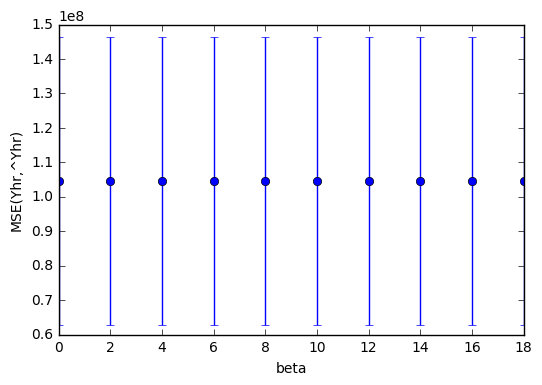

In [27]:
#rango = np.arange(100, 1001, 100)

mean3 = np.zeros((mean1000.shape[0], 3))
print mean2000.shape, mean3.shape
mean3[:, 0] = mean1000
mean3[:, 1] = mean2000
mean3[:, 2] = mean3000

#plt.plot(rango, mean3000,'o', label='b=3000')
#plt.plot(rango, mean1000, 'o', label='b=1000')
#plt.plot(rango, mean2000,'o', label='b=2000')
#plt.plot(rango, mean3.mean(axis=1),'o', label='b=all')
#plt.plot(rango, mean,'o', label='b=all')

#plt.plot(rango, mean+var,'o', label='b=all')
#plt.plot(rango, mean-var,'o', label='b=all')

#plt.errorbar(rango, mean, yerr=var, fmt='o', label='b=all')
plt.errorbar(rango, mean3.mean(axis=1), yerr=np.std(mean3, axis=1), fmt='o')


plt.legend()
plt.ylabel('MSE(Yhr,^Yhr)')
plt.xlabel(parameter_name)
#plt.legend(lala , loc=2, bbox_to_anchor=(1, 0.5))
#plt.ylim((1102000.0, 1102300.0))
mse[:,2,1]
#print plt.ylim((940000000.0, 960000000.0))

print 'medias=',mse.mean(),mse1000.mean(), mse2000.mean(), mse3000.mean() 
print 'std=',np.std(mse),np.std(mse1000), np.std(mse2000), np.std(mse3000) 
print 'mean1000', mean1000
print 'mean2000', mean2000
print 'mean', mean, mean.min()
print rango

import os
if not os.path.exists(base_folder+ 'res/'):
    try:
        os.makedirs(base_folder+ 'res/')
        print 'dir', base_folder+ 'res/', 'created!' 
    except OSError, e :
        print str(e)


## Para grabar
plt.savefig(base_folder+ 'res/'+parameter_name+'_mean_var_idjob'+idjob+'.pdf')

# Dibujando la reconstruida


(-0.6996299, 1.6709743)
A_g0_val0.
(-0.38038039, 1.777449)
A_g0_val1.
(-0.38054311, 1.7785807)
A_g0_val2.
(-0.38087872, 1.7776219)
A_g0_val3.
(-0.38091278, 1.7776611)
A_g0_val4.
(-0.38093346, 1.777683)
A_g0_val5.
(-0.38094735, 1.7776904)
A_g0_val6.
(-0.38093957, 1.7776957)
A_g0_val7.
(-0.38094687, 1.7776996)
A_g0_val8.
(-0.38095263, 1.7777029)
A_g0_val9.
(-0.60894752, 0.85167456)
A_g1_val0.
(-0.48025295, 0.80575949)
A_g1_val1.
(-0.48059657, 0.80576175)
A_g1_val2.
(-0.48062789, 0.80611545)
A_g1_val3.
(-0.48064333, 0.80589366)
A_g1_val4.
(-0.48065269, 0.80589151)
A_g1_val5.
(-0.48065966, 0.80589008)
A_g1_val6.
(-0.48066384, 0.80590504)
A_g1_val7.
(-0.48066714, 0.80590487)
A_g1_val8.
(-0.48066974, 0.80574656)
A_g1_val9.
(-0.49318552, 1.650533)
A_g2_val0.
(-0.40666202, 1.5684848)
A_g2_val1.
(-0.40833917, 1.5679877)
A_g2_val2.
(-0.40909508, 1.5678502)
A_g2_val3.
(-0.40963846, 1.5676942)
A_g2_val4.
(-0.40996745, 1.5676876)
A_g2_val5.
(-0.41010222, 1.567567)
A_g2_val6.
(-0.41003615, 1.5677146

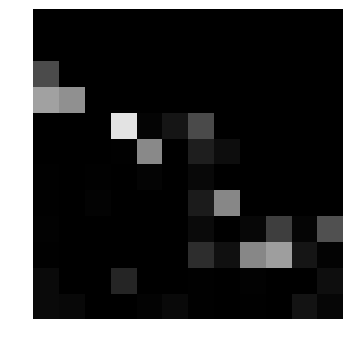

In [28]:
name_tmp3 = base_folder + 'A_g%d_val%d.npy'

for g in xrange(GROUPS):
    #if g == 0 : continue
    for i_val in xrange(len(rango)):
        val = rango[i_val]
        A = np.load(name_tmp3%(g,i_val))
        print mm(A, cast_int=False)
        plt = iu._is(A, vmin=0, vmax=1.5)
        name_img = ('A_g%d_val%d.npy'%(g, i_val))[:-3]
        print name_img
        plt.savefig(base_folder+ '/res/'+name_img +'png')

(-0.6996299, 1.6709744)
B_g0_val0.
(-0.38038036, 1.777449)
B_g0_val1.
(-0.38054308, 1.7785805)
B_g0_val2.
(-0.38087872, 1.7776219)
B_g0_val3.
(-0.38091278, 1.7776611)
B_g0_val4.
(-0.38093349, 1.777683)
B_g0_val5.
(-0.38094738, 1.7776903)
B_g0_val6.
(-0.38093954, 1.7776957)
B_g0_val7.
(-0.38094687, 1.7776997)
B_g0_val8.
(-0.3809526, 1.7777029)
B_g0_val9.
(-0.60894752, 0.85167456)
B_g1_val0.
(-0.48025292, 0.80575949)
B_g1_val1.
(-0.4805966, 0.80576175)
B_g1_val2.
(-0.48062792, 0.80611545)
B_g1_val3.
(-0.48064333, 0.8058936)
B_g1_val4.
(-0.48065266, 0.80589145)
B_g1_val5.
(-0.48065963, 0.80589008)
B_g1_val6.
(-0.48066384, 0.80590504)
B_g1_val7.
(-0.48066714, 0.80590481)
B_g1_val8.
(-0.48066974, 0.80574656)
B_g1_val9.
(-0.49318549, 1.650533)
B_g2_val0.
(-0.40666202, 1.5684848)
B_g2_val1.
(-0.40833917, 1.5679877)
B_g2_val2.
(-0.40909508, 1.5678502)
B_g2_val3.
(-0.40963849, 1.5676941)
B_g2_val4.
(-0.40996742, 1.5676877)
B_g2_val5.
(-0.41010222, 1.567567)
B_g2_val6.
(-0.41003615, 1.5677146)
B

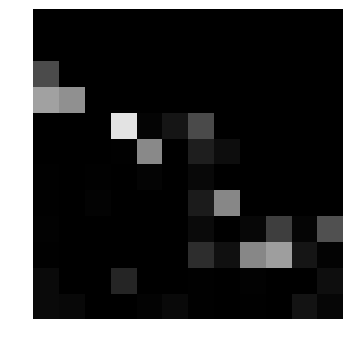

In [31]:
name_tmp3 = base_folder + 'B_g%d_val%d.npy'

for g in xrange(GROUPS):
    #if g == 0 : continue
    for i_val in xrange(len(rango)):
        val = rango[i_val]
        A = np.load(name_tmp3%(g,i_val))
        print mm(A, cast_int=False)
        plt = iu._is(A, vmin=0, vmax=1.5)
        name_img = ('B_g%d_val%d.npy'%(g, i_val))[:-3]
        print name_img
        plt.savefig(base_folder+ '/res/'+name_img +'png')

# Dibujando la original


(0.00096415909, 4.4262066)
i_hr_g0_103111.
(0.0, 51.797764)
i_hr_g1_101006.
(0.0, 32.989147)
i_hr_g2_101107.
(0.0, 4.1959381)
i_hr_g3_101915.
(0.0, 4.2103333)
i_hr_g4_102816.


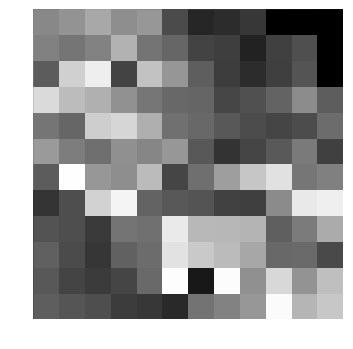

In [29]:
subjetc_fited = [103111, 101006, 101107, 101915,102816]
name_tmp4 = base_folder + 'i_hr_g%d_%d.npy'
for g in xrange(5):
    #if g == 0 : continue
    A = np.load(name_tmp4%(g,subjetc_fited[g]))
    print mm(A, cast_int=False)
    plt = iu._is(A, vmin=0, vmax=1.5)
    name_img = ('i_hr_g%d_%d.png'%(g, subjetc_fited[g]))[:-3]
    print name_img
    plt.savefig(base_folder + '/res/' +name_img)

# Dibujando la upsampleada antes de minimizar


(0.00064298313, 2.3340669)
i_hr_fake_g0.
(0.00018188616, 2.9902432)
i_hr_fake_g1.
(0.0, 2.2149892)
i_hr_fake_g2.
(0.00099337357, 2.8161852)
i_hr_fake_g3.
(0.0024674172, 3.1205568)
i_hr_fake_g4.


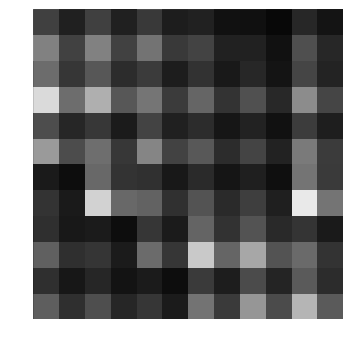

In [30]:
name_tmp4 = base_folder + 'i_hr_fake_g%d.npy'
for g in xrange(5):
    #if g == 0 : continue
    A = np.load(name_tmp4%(g,))
    print mm(A, cast_int=False)
    plt = iu._is(A, vmin=0, vmax=1.5)
    name_img = ('i_hr_fake_g%d.png'%(g,))[:-3]
    print name_img
    plt.savefig(base_folder + '/res/' +name_img)

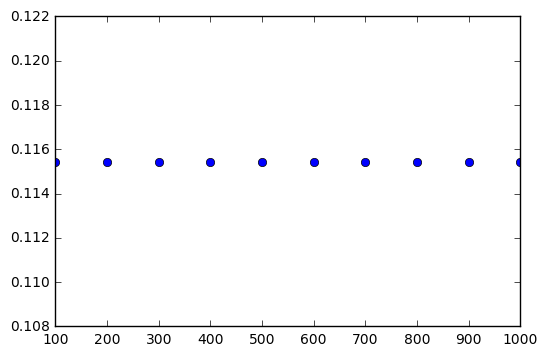

In [58]:
## Para grabar
g=4
for g in xrange(1):
    for i in xrange(1):
        a = plt.plot(rango, mse[:, i, g],'o')
    #plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_g'+str(g)+'_f'+str(i)+'.png')
    
    
#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_all.png')
    

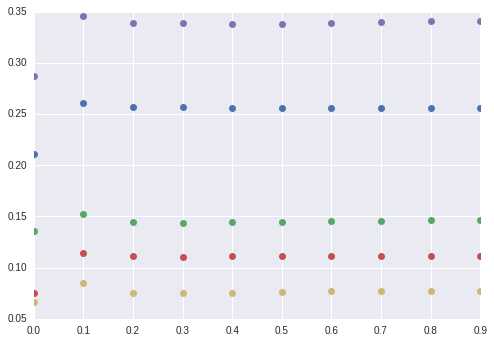

In [56]:
cluster = '1'
if cluster == '0':
    plt.plot(rango, mse[:, 0, 0],'o')
    plt.plot(rango, mse[:, 6, 0],'o')
    plt.plot(rango, mse[:, 7, 0],'o')

if cluster == '1':
    plt.plot(rango, mse[:, 1, 1],'o')
    plt.plot(rango, mse[:, 2, 1],'o')
    #plt.plot(rango, mse[:, 3, 0],'o')
    plt.plot(rango, mse[:, 4, 1],'o')
    plt.plot(rango, mse[:, 5, 1],'o')
    plt.plot(rango, mse[:, 8, 1],'o')



In [61]:
name_tmp4 = base_folder + 'i_hr_g%d.npy'
for g in xrange(5):
    A = np.load(name_tmp3%(g,))
    i_hr = np.load(name_tmp4%(g,))
    #print mm(A, cast_int=False)
    plt = iu._isc(A,i_hr, vmin=0, vmax=1, titles=['reconstructed', 'original'])
    name_img = base_folder + ('cmp_g%d'%(g))
    print name_img
    plt.savefig(name_img +'.png')

TypeError: not enough arguments for format string

In [9]:
i_hr = np.load(base_folder+'i_hr_g0.npy')
A910000 = np.load(base_folder+'A_g0_lamda910000.npy')
iu._isc(A910000,i_hr, vmax=1.4)
A910000.min(), A910000.max(), A910000.shape
del(A100)

IOError: [Errno 2] No such file or directory: './results/exp6/f1/gamma/A_g0_lamda910000.npy'

(0.0, 2729.8464)

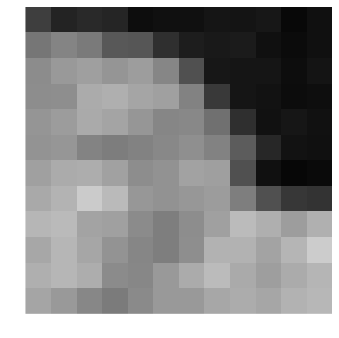

In [16]:
iu._is(i_hr, vmax=2729)
i_hr.min(),i_hr.max()

(-1.5125681573504312e-05, 1.4016132523250628, (12, 12, 12, 270))

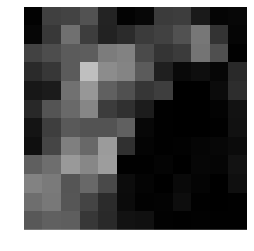

In [51]:
A1000 = np.load(base_folder+'A_g0_lamda1000.npy')
iu._is(A1000, vmax=A1000.max())
A1000.min(), A1000.max(), A1000.shape

(-1.5125681573504312e-05, 1.4016132523250628, (12, 12, 12, 270))

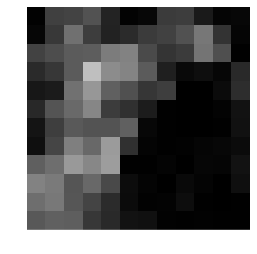

In [51]:
A1000 = np.load(base_folder+'A_g0_lamda3000.npy')
iu._is(A1000, vmax=A1000.max())
A1000.min(), A1000.max(), A1000.shape

In [30]:
alala = []
for val in rango :
    alala.append(val)
    
print alala

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
